In [1]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
df = pd.read_excel('./glassdoor_reviews_COPY_FULL.xlsx')
# Now you can work with the dataframe 'df'
# Example: print the first 5 rows
df.head()

,Review ID,Company Name,Overall Rating,Header,Job Title,Employment Status,Employment Tenure,Location,Recommend,CEO Approval,Business Outlook,Pros,Cons,Review Date
0,1,Deloitte,3,Good learning,Senior manager,Current employee,more than 10 years,Mumbai,Yes,Yes,Yes,Lot of learning and to work on latest technolo...,Work life fit and bureaucracy,"Oct 28, 2024"
1,2,Deloitte,3,Work environment,Senior tax manager,Current employee,more than 10 years,Portugal,No,No Data,No,Acess to information and a lot of learning cou...,Environment very competitive between colleague...,"Oct 28, 2024"
2,3,Deloitte,4,Good work culture,Analyst,Current employee,less than 1 year,Hyderābād,Yes,Yes,Yes,Flexi and nice people communication,Less salary and also growth is slow,"Oct 28, 2024"
3,4,Deloitte,4,Good place,Senior developer,Current employee,NaN,Bengaluru,No Data,No Data,No Data,Good working culture in the office,Less salary and less increments,"Oct 28, 2024"
4,5,Deloitte,3,Life at deloitte,Tax consultant,Former employee,NaN,Pune,No Data,No Data,No Data,"Great working environment, Good mentoring",Too many working hours and no extra payment,"Oct 28, 2024"


In [2]:
# prompt: Remove special characters from Pros and Cons column. Also remove the word "page" from it

import re

def remove_special_characters(text):
    if isinstance(text, str):
        # Remove special characters and the word "page"
        text = re.sub(r'[^\w\s]', '', text)
        text = text.replace("page", "")
        return text
    else:
        return text

df['Pros'] = df['Pros'].apply(remove_special_characters)
df['Cons'] = df['Cons'].apply(remove_special_characters)
df.head()

,Review ID,Company Name,Overall Rating,Header,Job Title,Employment Status,Employment Tenure,Location,Recommend,CEO Approval,Business Outlook,Pros,Cons,Review Date
0,1,Deloitte,3,Good learning,Senior manager,Current employee,more than 10 years,Mumbai,Yes,Yes,Yes,Lot of learning and to work on latest technolo...,Work life fit and bureaucracy,"Oct 28, 2024"
1,2,Deloitte,3,Work environment,Senior tax manager,Current employee,more than 10 years,Portugal,No,No Data,No,Acess to information and a lot of learning cou...,Environment very competitive between colleagues,"Oct 28, 2024"
2,3,Deloitte,4,Good work culture,Analyst,Current employee,less than 1 year,Hyderābād,Yes,Yes,Yes,Flexi and nice people communication,Less salary and also growth is slow,"Oct 28, 2024"
3,4,Deloitte,4,Good place,Senior developer,Current employee,NaN,Bengaluru,No Data,No Data,No Data,Good working culture in the office,Less salary and less increments,"Oct 28, 2024"
4,5,Deloitte,3,Life at deloitte,Tax consultant,Former employee,NaN,Pune,No Data,No Data,No Data,Great working environment Good mentoring,Too many working hours and no extra payment,"Oct 28, 2024"


In [3]:
# prompt: create a new column "employment status_encoded" which has Employment status values 0 for Former employee and 1 for Current employee

# Create the new column 'employment status_encoded'
df['employment status_encoded'] = df['Employment Status'].map({'Former employee': 0, 'Current employee': 1})

In [4]:
# prompt: create a new column "Review" that joins the Pros and Cons columns

# Assuming 'df' is your DataFrame as defined in the previous code
df['Review'] = df['Pros'].astype(str) + ' ' + df['Cons'].astype(str)
df.head()

,Review ID,Company Name,Overall Rating,Header,Job Title,Employment Status,Employment Tenure,Location,Recommend,CEO Approval,Business Outlook,Pros,Cons,Review Date,employment status_encoded,Review
0,1,Deloitte,3,Good learning,Senior manager,Current employee,more than 10 years,Mumbai,Yes,Yes,Yes,Lot of learning and to work on latest technolo...,Work life fit and bureaucracy,"Oct 28, 2024",1,Lot of learning and to work on latest technolo...
1,2,Deloitte,3,Work environment,Senior tax manager,Current employee,more than 10 years,Portugal,No,No Data,No,Acess to information and a lot of learning cou...,Environment very competitive between colleagues,"Oct 28, 2024",1,Acess to information and a lot of learning cou...
2,3,Deloitte,4,Good work culture,Analyst,Current employee,less than 1 year,Hyderābād,Yes,Yes,Yes,Flexi and nice people communication,Less salary and also growth is slow,"Oct 28, 2024",1,Flexi and nice people communication Less sala...
3,4,Deloitte,4,Good place,Senior developer,Current employee,NaN,Bengaluru,No Data,No Data,No Data,Good working culture in the office,Less salary and less increments,"Oct 28, 2024",1,Good working culture in the office Less salar...
4,5,Deloitte,3,Life at deloitte,Tax consultant,Former employee,NaN,Pune,No Data,No Data,No Data,Great working environment Good mentoring,Too many working hours and no extra payment,"Oct 28, 2024",0,Great working environment Good mentoring Too ...


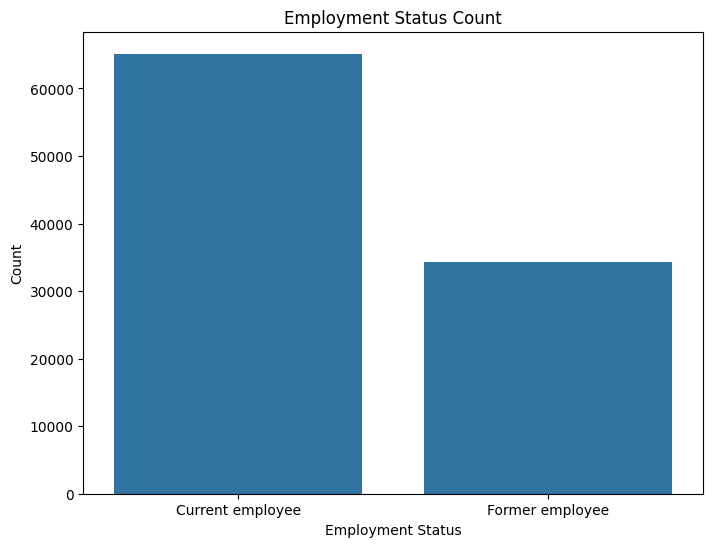

In [5]:
# prompt: Make a graph of Employment Status count

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code

# Count the occurrences of each employment status
employment_status_counts = df['Employment Status'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Employment Status', data=df)
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import numpy as np
 
import tensorflow_hub as hub

# Sample data
texts = df['Pros']
labels = df['employment status_encoded']

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(texts)]

# Train Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=2, epochs=20)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Define pipeline with optimizations
pipeline = Pipeline([
    #('vectorizer', TfidfVectorizer(stop_words='english', max_features=10000, max_df=0.95, min_df=0.05,ngram_range=(1, 2))),
     ('doc2vec', FunctionTransformer(lambda x: np.array([model.infer_vector(text.split()) for text in x]), validate=False)),
   ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f" RandomForestClassifier Accuracy: {score}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
'''
#Bertopic: adding overall rating as a X variable:
from bertopic import BERTopic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
 
# Sample data
texts = df['Pros'][:20000]
labels = df['employment status_encoded'][:20000]
overall_rating = df['Overall Rating'][:20000]  # Include 'Overall Rating'
 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
 
# Reset the index for train and test sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
 
# Initialize SentenceTransformer for generating embeddings
sentence_model = SentenceTransformer('all-mpnet-base-v2')  # Initialize a SentenceTransformer model
 
# Define BERTopic with SentenceTransformer
topic_model = BERTopic(embedding_model=sentence_model, nr_topics=15, verbose=True)
 
# Fit BERTopic on the raw text data
topics_train, _ = topic_model.fit_transform(X_train)  # Pass raw text, not embeddings
topics_test, _ = topic_model.transform(X_test)  # Pass raw text for the test data
 
# Convert topics_train and topics_test from lists to NumPy arrays
topics_train = np.array(topics_train)
topics_test = np.array(topics_test)
 
# Ensure topics_train and topics_test are 2D
topics_train = topics_train.reshape(-1, 1) if topics_train.ndim == 1 else topics_train
topics_test = topics_test.reshape(-1, 1) if topics_test.ndim == 1 else topics_test
 
# Flatten y_train and y_test if necessary (to ensure they are 1D arrays)
y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()
 
# Add the 'Overall Rating' as an additional feature
X_train_combined = np.hstack([topics_train, np.array(overall_rating[:len(topics_train)]).reshape(-1, 1)])  # Combine topic distributions and overall rating
X_test_combined = np.hstack([topics_test, np.array(overall_rating[len(topics_train):]).reshape(-1, 1)])  # Combine topic distributions and overall rating
 
# Train a RandomForestClassifier using the combined features
classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42,class_weight='balanced')
classifier.fit(X_train_combined, y_train)  # Train classifier on combined features
 
# Predict and evaluate
y_pred = classifier.predict(X_test_combined)  # Make predictions using combined features
score = accuracy_score(y_test, y_pred)  # Evaluate the accuracy
print(f"RandomForestClassifier Accuracy with BERTopic and Overall Rating: {score}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

No sentence-transformers model found with name sentence-transformers/all-mpnet-base-v2. Creating a new one with mean pooling.


SSLError: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /sentence-transformers/all-mpnet-base-v2/resolve/main/adapter_config.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))"), '(Request ID: 2e69d8e9-b245-4e26-8871-d1f91574080b)')